In [1]:
#Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats=np.random.uniform(-90.000,90.000,size=1500)
lngs=np.random.uniform(-180.000,180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [4]:
#Import citipy
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities=[]
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm a sufficient count
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f5b26a65a73570e25724bcfdba94c13a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kieta
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | uruzgan
Processing Record 4 of Set 1 | energetik
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | beyneu
Processing Record 9 of Set 1 | envira
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | sitia
Processing Record 13 of Set 1 | romitan
Processing Record 14 of Set 1 | nouadhibou
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | coihaique
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | kamenka
Processing Record 22 of Set 1 | la ronge
Processing Record 23 of Set 1 | jamestown
Processing

In [11]:
print(len(city_data))

570


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kieta,-6.2167,155.6333,82.98,70,88,4.14,PG,2021-08-09 04:04:38
1,Ushuaia,-54.8000,-68.3000,36.23,95,100,8.23,AR,2021-08-09 04:01:54
2,Uruzgan,32.8333,66.0000,82.96,13,2,4.74,AF,2021-08-09 04:04:39
3,Energetik,51.7445,58.7934,67.14,61,53,7.38,RU,2021-08-09 04:04:39
4,Fortuna,40.5982,-124.1573,59.09,68,1,3.00,US,2021-08-09 04:01:09
5,Busselton,-33.6500,115.3333,58.05,68,81,27.36,AU,2021-08-09 04:04:40
6,Tasiilaq,65.6145,-37.6368,48.36,92,100,15.52,GL,2021-08-09 04:01:14
7,Beyneu,45.3167,55.2000,89.13,18,0,12.53,KZ,2021-08-09 04:02:06
8,Envira,-7.3000,-70.2167,73.27,58,18,2.93,BR,2021-08-09 04:04:40
9,Khatanga,71.9667,102.5000,57.04,81,100,11.39,RU,2021-08-09 04:04:41


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kieta,PG,2021-08-09 04:04:38,-6.2167,155.6333,82.98,70,88,4.14
1,Ushuaia,AR,2021-08-09 04:01:54,-54.8000,-68.3000,36.23,95,100,8.23
2,Uruzgan,AF,2021-08-09 04:04:39,32.8333,66.0000,82.96,13,2,4.74
3,Energetik,RU,2021-08-09 04:04:39,51.7445,58.7934,67.14,61,53,7.38
4,Fortuna,US,2021-08-09 04:01:09,40.5982,-124.1573,59.09,68,1,3.00
5,Busselton,AU,2021-08-09 04:04:40,-33.6500,115.3333,58.05,68,81,27.36
6,Tasiilaq,GL,2021-08-09 04:01:14,65.6145,-37.6368,48.36,92,100,15.52
7,Beyneu,KZ,2021-08-09 04:02:06,45.3167,55.2000,89.13,18,0,12.53
8,Envira,BR,2021-08-09 04:04:40,-7.3000,-70.2167,73.27,58,18,2.93
9,Khatanga,RU,2021-08-09 04:04:41,71.9667,102.5000,57.04,81,100,11.39


In [16]:
#Create the output file (csv)
output_data_file="weather_data/cities.csv"
#Export to csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628483171.3164148

In [19]:
today = time.strftime("%x")
today

'08/09/21'

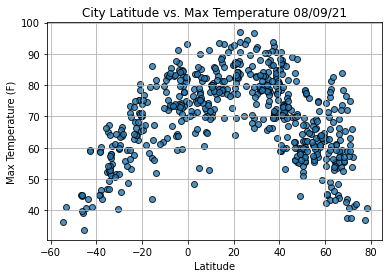

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

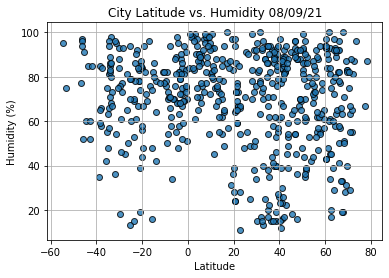

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

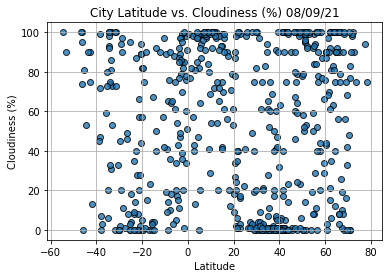

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

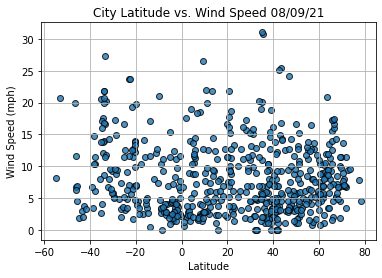

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                   Nouadhibou
Country                        MR
Date          2021-08-09 04:04:42
Lat                        20.931
Lng                      -17.0347
Max Temp                     69.6
Humidity                       86
Cloudiness                      2
Wind Speed                  17.81
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
565     True
566     True
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Uruzgan,AF,2021-08-09 04:04:39,32.8333,66.0000,82.96,13,2,4.74
3,Energetik,RU,2021-08-09 04:04:39,51.7445,58.7934,67.14,61,53,7.38
4,Fortuna,US,2021-08-09 04:01:09,40.5982,-124.1573,59.09,68,1,3.00
6,Tasiilaq,GL,2021-08-09 04:01:14,65.6145,-37.6368,48.36,92,100,15.52
7,Beyneu,KZ,2021-08-09 04:02:06,45.3167,55.2000,89.13,18,0,12.53


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

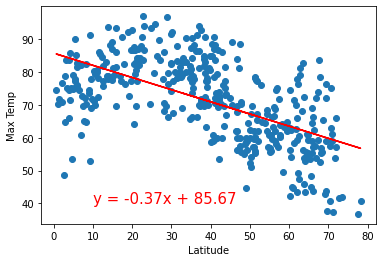

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

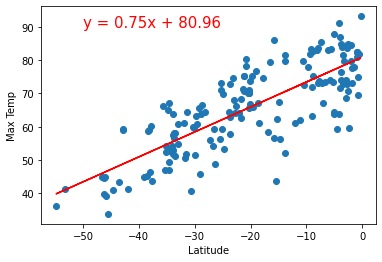

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

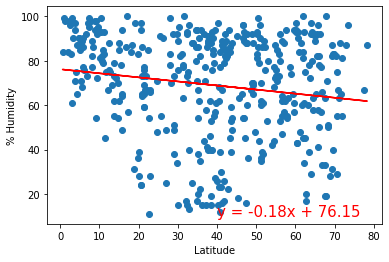

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

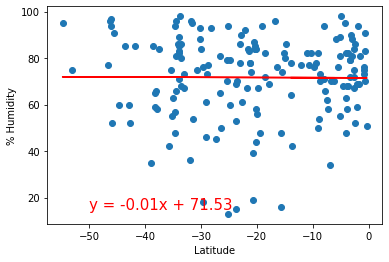

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

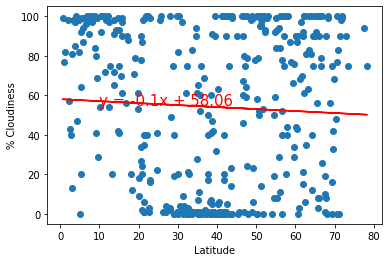

In [33]:
# Linear regression on the Northern Hemisphere Cloudiness 6.4.4
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

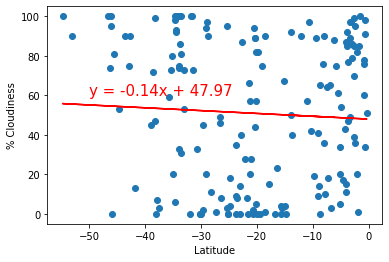

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

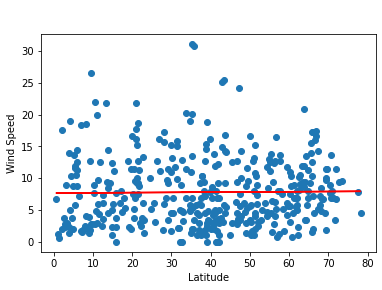

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

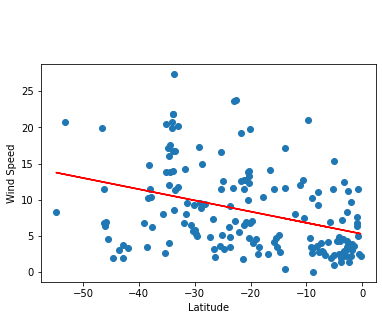

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))